In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [155]:
df=pd.read_csv('economic_index.csv')

In [156]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [157]:
#drop unneccessary columns
df.drop(columns=['Unnamed: 0',"year","month"],axis=1,inplace=True)

In [158]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [159]:
# checking the null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

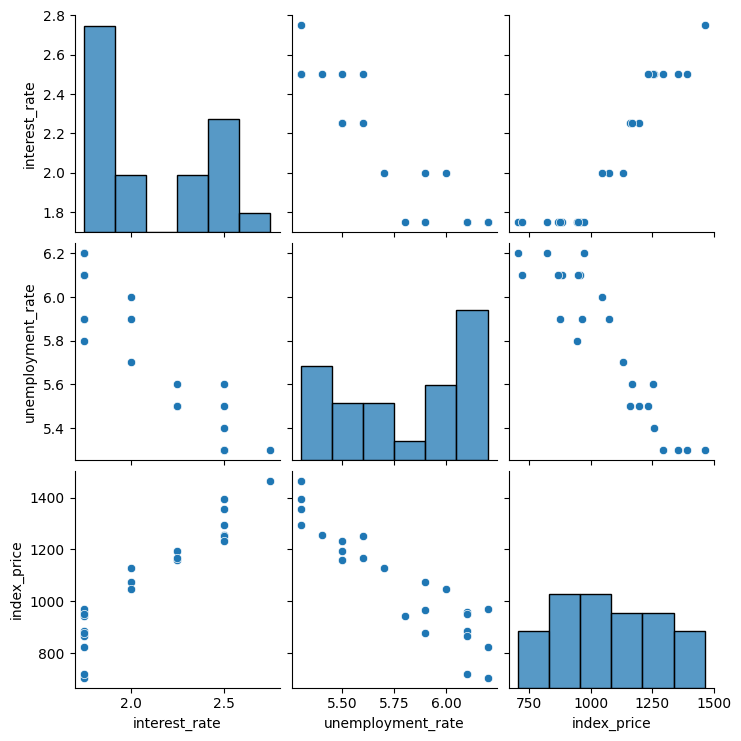

In [160]:
# visualization

sns.pairplot(df)

In [161]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

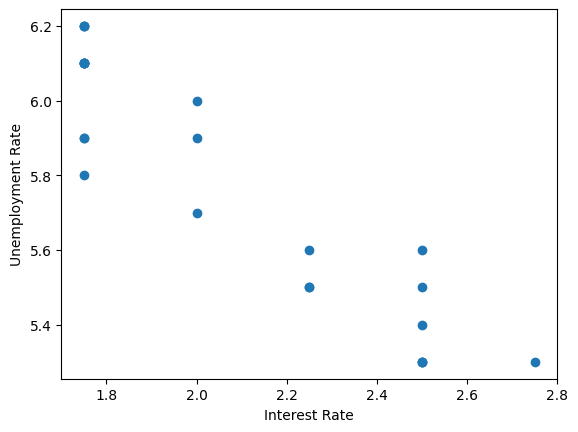

In [162]:
# visualizing the data points more closely

plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [163]:
# dividing the independent and dependent features
X=df.iloc[:,:-1]     # independent features
y=df['index_price']  # dependent features

In [164]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

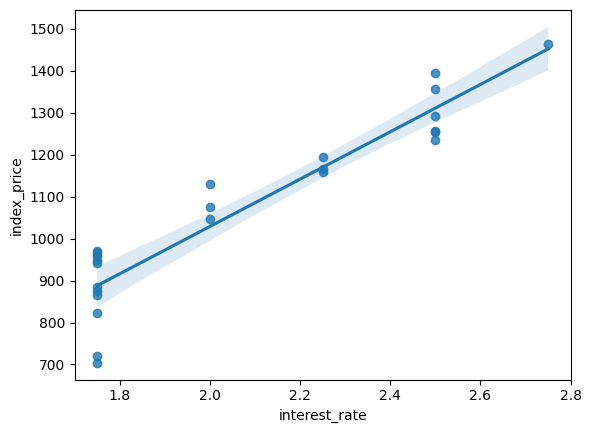

In [165]:
# visualization
sns.regplot(x='interest_rate',y='index_price',data=df)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

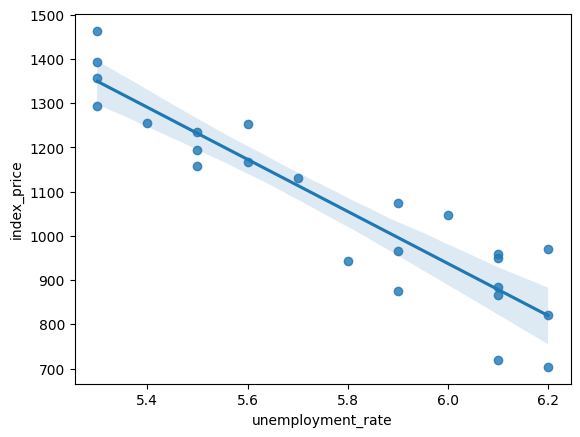

In [166]:
sns.regplot(x='unemployment_rate',y='index_price',data=df)

In [167]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [168]:
regression=LinearRegression()

In [169]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [170]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=4)

In [171]:
validation_score

array([-2240.54883918, -8172.45799039, -8732.75278347, -1719.85743107])

In [172]:
np.mean(validation_score)

np.float64(-5216.404261025979)

In [173]:
y_pred=regression.predict(X_test)

In [174]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [175]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mse=mean_squared_error(y_test,y_pred=y_pred)
mae=mean_absolute_error(y_test,y_pred=y_pred)
rmse=np.sqrt(mse)

In [176]:
print(rmse)
print(mse)
print(mae)

76.11677139574805
5793.762887712569
59.935781523235484


In [177]:
score=r2_score(y_test,y_pred=y_pred)
print(score)

0.8278978091457145


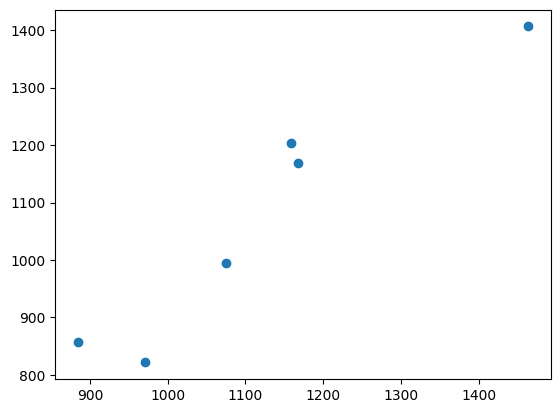

In [178]:
plt.scatter(y_test,y_pred)

In [179]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


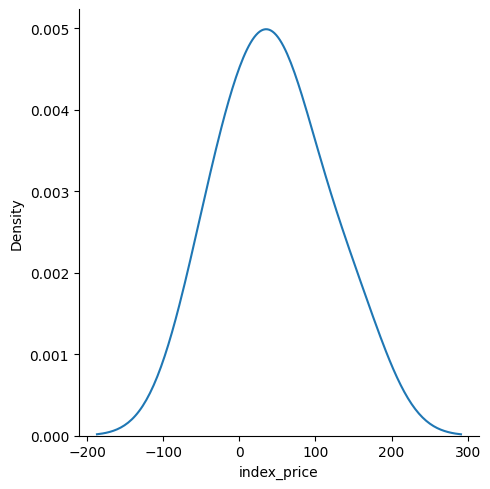

In [180]:
#ploting the above residuals

sns.displot(residuals,kind='kde')

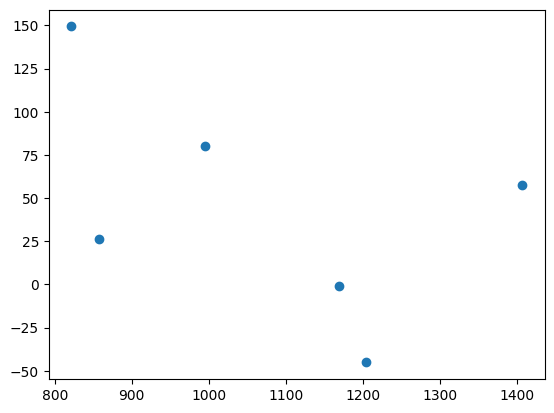

In [181]:
# scatter plot w.r.t prediction and residuals
plt.scatter(y_pred,residuals)

In [182]:
regression.coef_

array([  88.27275507, -116.25716066])

In [183]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 15 Aug 2025   Prob (F-statistic):                       0.754
Time:                        13:22:53   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""